<a href="https://colab.research.google.com/github/KUSUMAJOGARAO/Edunet/blob/main/EDA_and_Modeling_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).**

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


This is a well known dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).  The data is from a marketing campaign designed to pick customers with a higher than normal propensity to uptake a term deposit offer.  A term deposit is a deposit that a financial institution offers with a high fixed rate and a fixed maturity date.  There are two datasets that we investigated:

*   bank-full.csv with all 45211 observations, ordered by date from May 2008 to November 2010
*   bank.csv with 10% of the examples (4521) randomly  selected from bank-full.csv

The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM). The classification goal is to predict if the client will subscribe a term deposit (variable y).

There are 16 input variables:

**Client data:**
1.   age (*numeric*)
2.   job : type of job (*categorical*: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
3.   marital : marital status (*categorical*: "married","divorced","single"; note: "divorced" means divorced or widowed)
4.   education (*categorical*: "unknown","secondary","primary","tertiary")
5.   default: has credit in default? (*binary*: "yes","no")
6.   balance: average yearly balance, in euros (*numeric*)
7.   housing: has housing loan? (*binary*: "yes","no")
8.   loan: has personal loan? (*binary*: "yes","no")

**Campaign data:**
9.   contact: contact communication type (*categorical*: "unknown","telephone","cellular")
10.   day: last contact day of the month (*numeric*)
11.   month: last contact month of year (*categorical*: "jan", "feb", "mar", ..., "nov", "dec")
12.   duration: last contact duration, in seconds (*numeric*)

**Other attributes:**
13.   campaign: number of contacts performed during this campaign and for this client (*numeric*, includes last contact)
14.   pdays: number of days that passed by after the client was last contacted from a previous campaign (*numeric*: -1 means client was not previously contacted)
15.   previous: (*numeric*: number of contacts performed before this campaign and for this client)
16.   poutcome: outcome of the previous marketing campaign (*categorical*: "unknown","other","failure","success")

**Target variable:**
17.   y - has the client subscribed a term deposit? (*binary*: "yes","no")



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import random

import warnings
warnings.filterwarnings("ignore")

full = 'https://raw.githubusercontent.com/3253group3/FinalProject/master/bank-full.csv'
sample = 'https://raw.githubusercontent.com/3253group3/FinalProject/master/bank.csv'
df = pd.read_csv(full, delimiter = ';')

In [8]:
# Check the shape of the dataset
print(df.shape)

# Check df_baseline
df.y.value_counts() / len(df.y)

(45211, 17)


no     0.883015
yes    0.116985
Name: y, dtype: float64

In [9]:
# Since the dataset is unbalanced let's extract and count the smaller class of positives
df_y=df[df['y']=="yes"]
print("Positive samples:",df_y.shape)

Positive samples: (5289, 17)


In [10]:
# Next we will extract all the negatives and random sample a subset equal to the class of positives
random.seed(a=42) # Set random seed
df_n = df[df['y']=="no"] # Collect the negatives
df_n= df_n.sample(n=len(df_y)) # Create a random sample of negatives equal to positives
print("Balanced negative samples:",df_n.shape) # Check the length of the negative sample

Balanced negative samples: (5289, 17)


In [11]:
# Append the negative sample balanced with the positive class
df_balanced=df_y.append(df_n)
print("Combined samples:",df_balanced.shape)

Combined samples: (10578, 17)


In [12]:
# Let's random sample a baseline dataset equal in length to the balanced data set
df_baseline=df.sample(n=len(df_balanced))
print("Baseline dataset",df_baseline.shape)

Baseline dataset (10578, 17)


In [13]:
# Check df_baseline
print("Baseline Dataset Label Distribution\n",df_baseline.y.value_counts() / len(df_baseline.y))

Baseline Dataset Label Distribution
 no     0.885801
yes    0.114199
Name: y, dtype: float64


In [14]:
# Check df_balanced
print("Balanced Dataset Label Distribution\n",df_balanced.y.value_counts() / len(df_balanced.y))

Balanced Dataset Label Distribution
 yes    0.5
no     0.5
Name: y, dtype: float64


# 1. Data Preparation and Pre-prediction Exploratory Data Analysis

In [15]:
#@title ## Explore the Balanced Class Data

In [16]:
# Take a peak at the baseline dataset
df_balanced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [17]:
# The range of mean and std are big --> may require normalization
df_balanced.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.141615,1550.448951,15.607393,379.006334,2.494990,52.292399,0.836075
std,11.892430,3273.585943,8.406556,351.414800,2.656436,109.520887,2.237225
min,18.000000,-3058.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,32.000000,120.250000,8.000000,142.000000,1.000000,-1.000000,0.000000
50%,39.000000,556.000000,15.000000,257.000000,2.000000,-1.000000,0.000000
75%,49.000000,1713.750000,21.750000,511.000000,3.000000,56.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,39.000000,854.000000,58.000000


In [18]:
# There are 7 int64 and 10 object
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10578 entries, 83 to 32377
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10578 non-null  int64 
 1   job        10578 non-null  object
 2   marital    10578 non-null  object
 3   education  10578 non-null  object
 4   default    10578 non-null  object
 5   balance    10578 non-null  int64 
 6   housing    10578 non-null  object
 7   loan       10578 non-null  object
 8   contact    10578 non-null  object
 9   day        10578 non-null  int64 
 10  month      10578 non-null  object
 11  duration   10578 non-null  int64 
 12  campaign   10578 non-null  int64 
 13  pdays      10578 non-null  int64 
 14  previous   10578 non-null  int64 
 15  poutcome   10578 non-null  object
 16  y          10578 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [19]:
# There are no NaNs
df_balanced.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
# Examine the number of unique value for each column
df_balanced.nunique().to_frame(name = 'Count').sort_values(by = 'Count',ascending=False)

,Count
balance,3718
duration,1429
pdays,469
age,75
campaign,34
previous,31
day,31
job,12
month,12
poutcome,4


In [21]:
# Examine unique values for categoricals
for col in ['job','marital','education','default','housing','loan','contact','month','poutcome']:
    print(col, '\n', df_balanced[col].unique())

job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'unemployed'
 'blue-collar' 'entrepreneur' 'housemaid' 'self-employed' 'unknown'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'unknown' 'primary']
default 
 ['no' 'yes']
housing 
 ['yes' 'no']
loan 
 ['no' 'yes']
contact 
 ['unknown' 'cellular' 'telephone']
month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 
 ['unknown' 'other' 'failure' 'success']


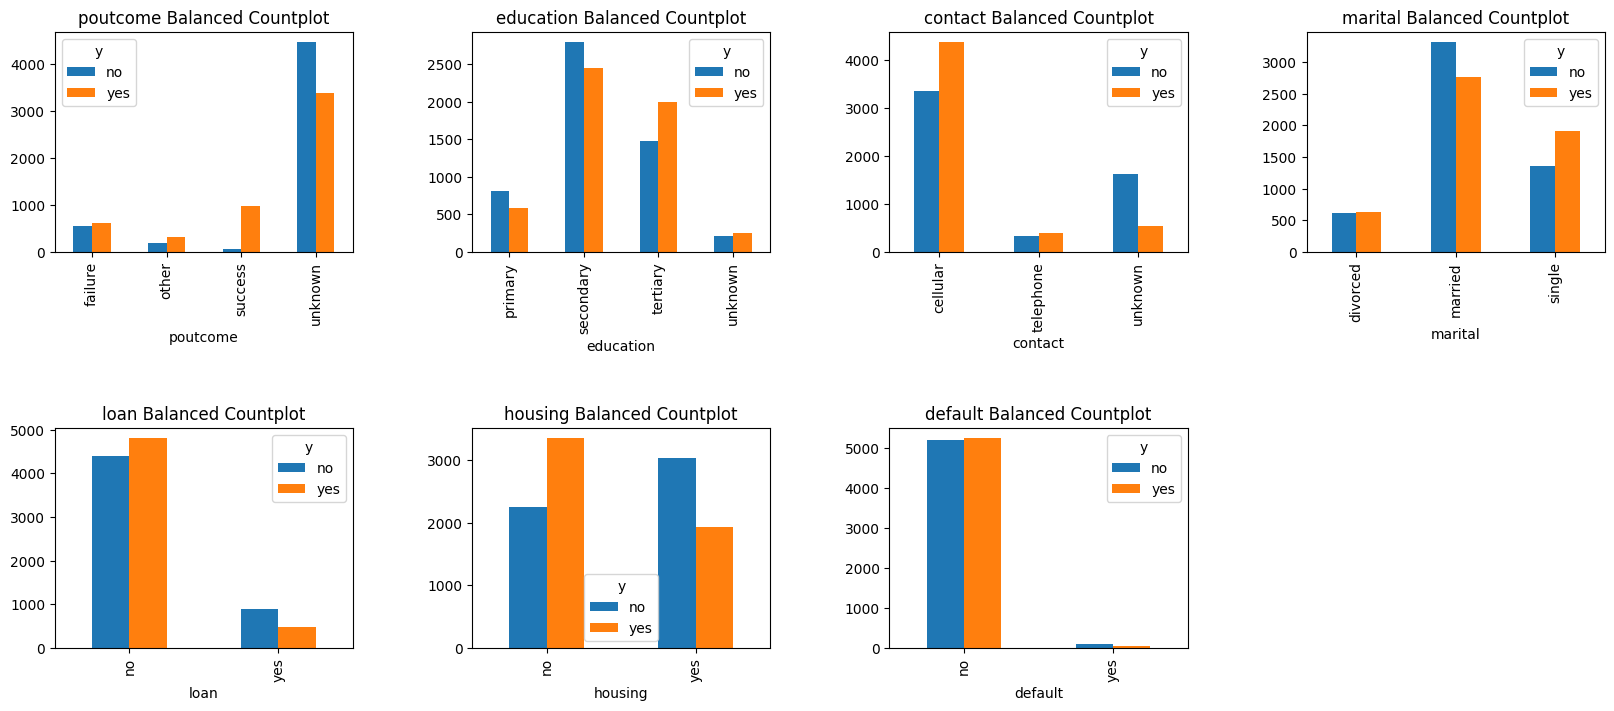

In [22]:
# Crosstab poutcome, education, contact, marital, loan, housing and default against label y
def crosstab1(df,Label,lis):
  fig = plt.figure(figsize=(20, 8))
  fig.subplots_adjust(hspace=0.8, wspace=0.4)

  for i , col in enumerate(lis):
    ax=plt.subplot(241 + i)
    pd.crosstab(df[col],df['y']).plot(kind='bar', ax = ax)
    plt.title(col + Label+' Countplot')

  plt.show()
  return

lis = ['poutcome','education','contact','marital','loan','housing','default']
#crosstab1(df_baseline,' Baseline',lis)
crosstab1(df_balanced,' Balanced',lis)

In [23]:
# Examine previous campaign outcome (poutcome) in more detail
poutcome_success=df[df['poutcome']=='success']
poutcome_success.y.value_counts() / len(poutcome_success.y)

yes    0.647253
no     0.352747
Name: y, dtype: float64

**Observations on poutcome, education, contact, marital, loan, housing and default.**

* poutcome. Almost twice as many clients who previously accepted a campaign offer (poutcome==success) said "yes" to the term loan.
* education. Slightly more prospects with a tertiary educations said "yes".
* contact. Slightly more clients with a cellular phone said "yes".
* housing. More clients with a mortgage said "yes".



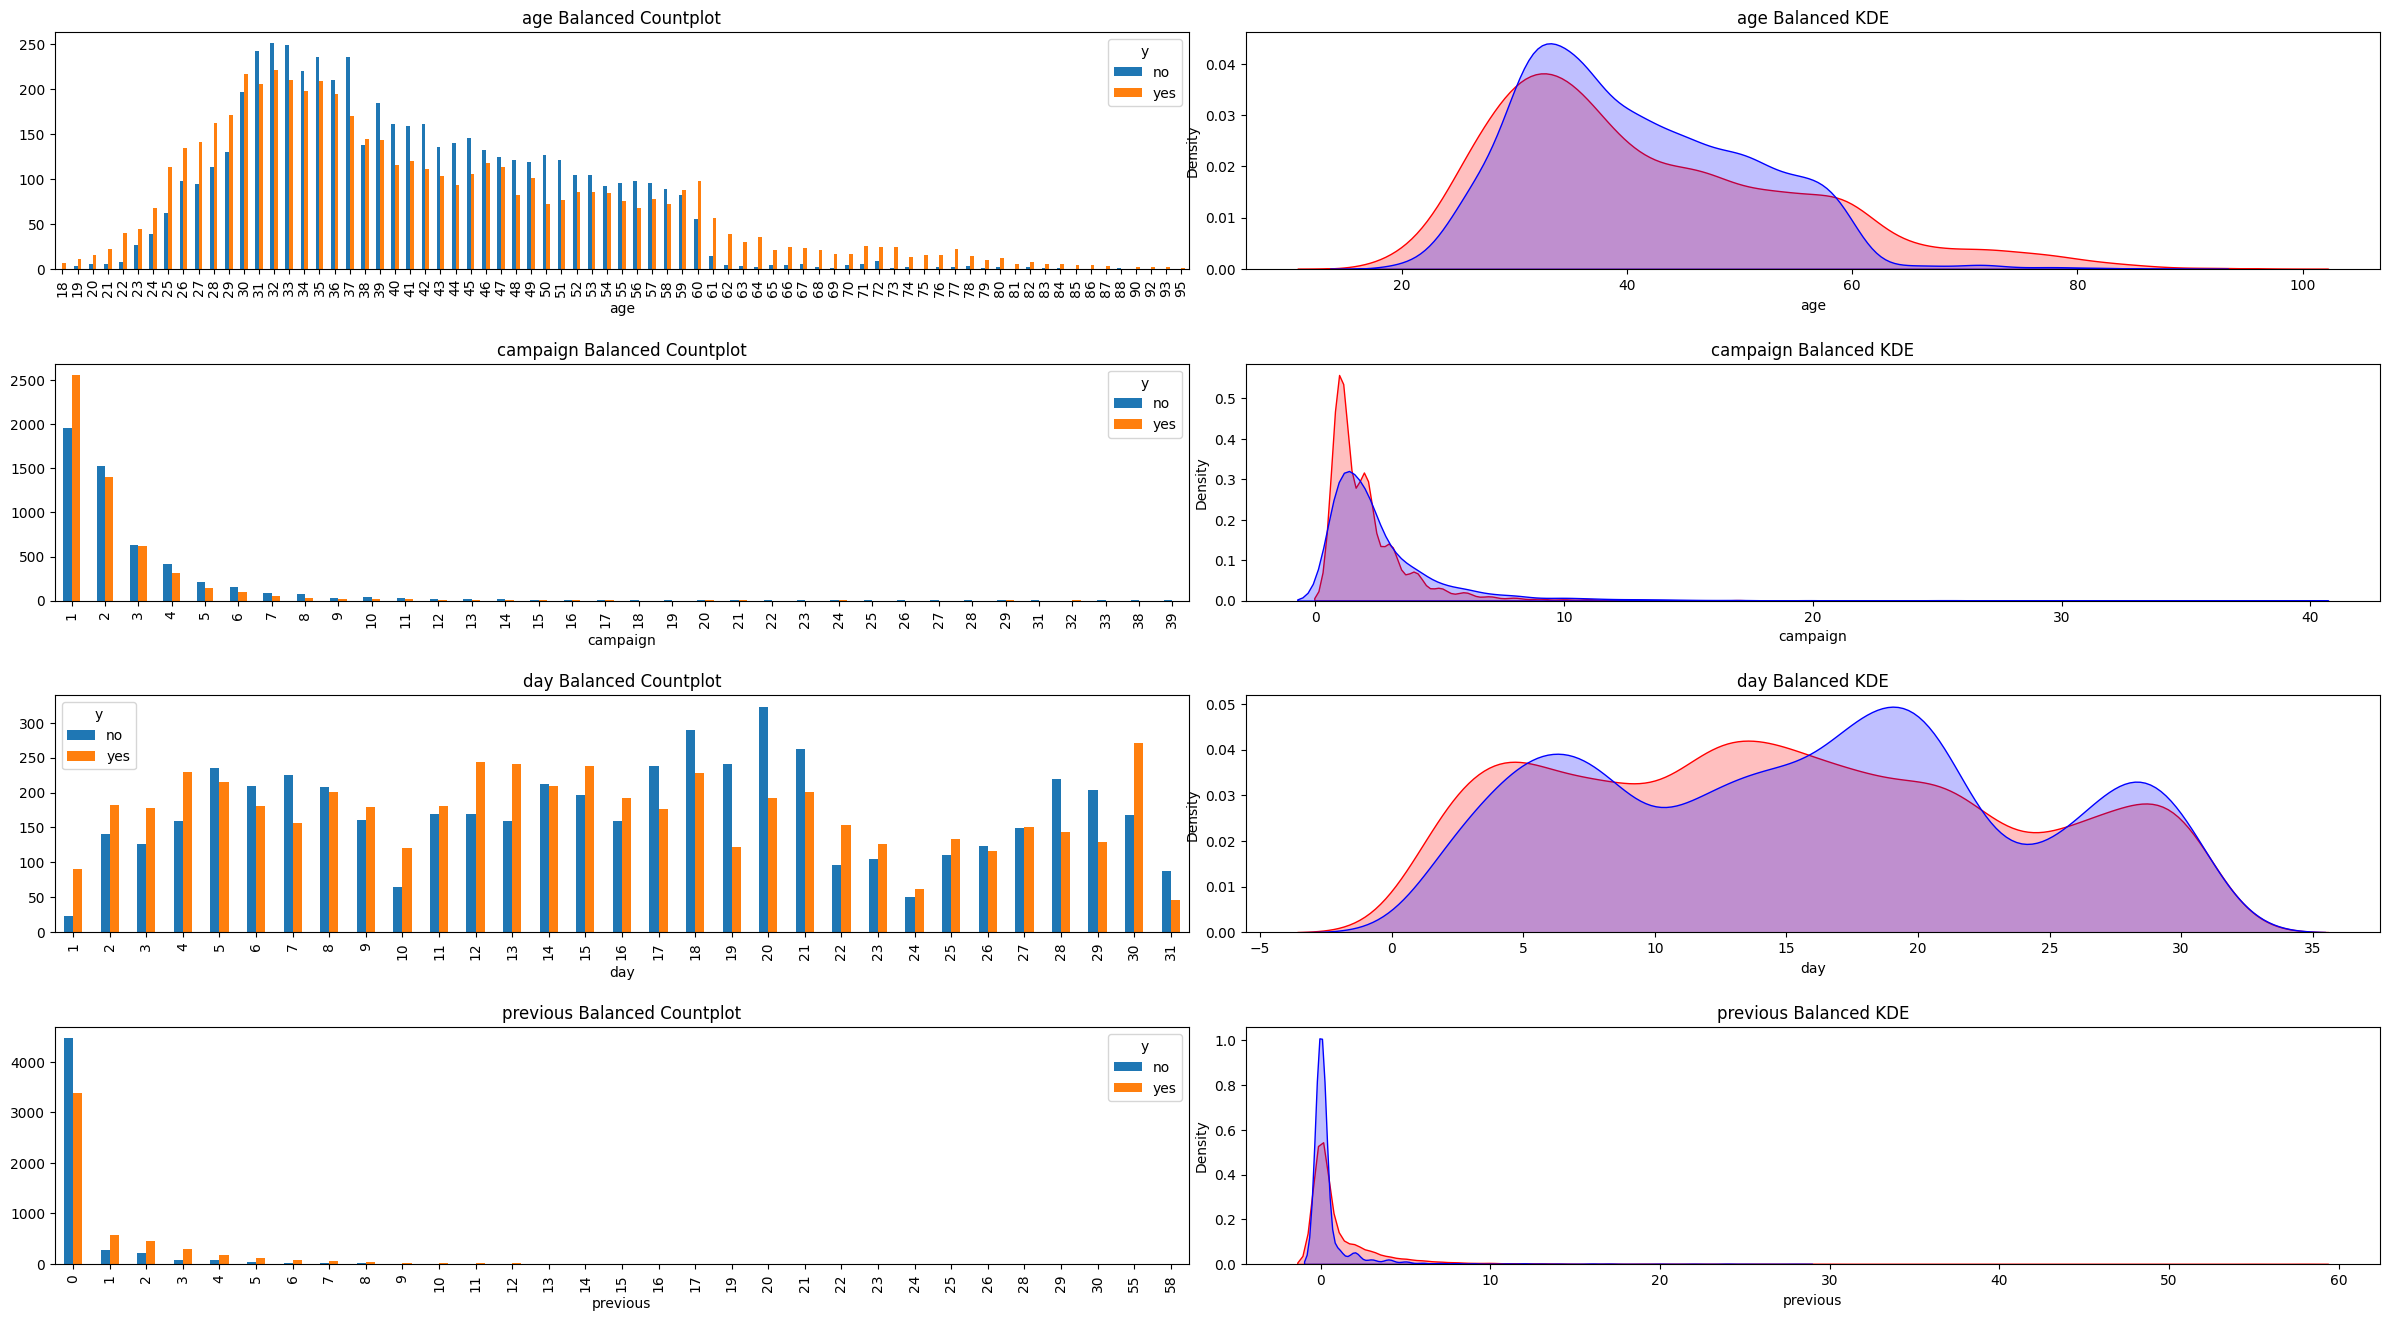

In [24]:
# Crosstab and KDE age, campaign, day and previous against label y
def crosstab_kde(df,Label,lis):
  fig = plt.figure(figsize=(30, 16))
  fig.subplots_adjust(hspace=0.4, wspace=0.05)
  for i , col in enumerate(lis):
    ax = plt.subplot(421 + i * 2)
    pd.crosstab(df[col],df['y']).plot(kind='bar', ax = ax)
    plt.title(col + Label+' Countplot')

    ax1 = plt.subplot(422 + i *2)
    ax1 = sns.kdeplot(df[col][df.y == 'yes'], shade=True, color="r",label='yes')
    ax1 = sns.kdeplot(df[col][df.y == 'no'], shade=True, color="b",label='no')
    plt.title(col + Label+' KDE')

  plt.show()

lis = ['age','campaign','day','previous']
#crosstab_kde(df_baseline,' Baseline',lis)
crosstab_kde(df_balanced,' Balanced',lis)

**Observations on age, campaign, day and previous features.**

* age. More of the oldest and the youngest said "yes" while middle age said "no" to the term loan.
* campaign. If you had exactly one contact during this campaign you were more likely to say "yes".
* day. More on the 19th and 20th said "no" and more on the 30th said "yes".
* previous. If you had no prior contacts before this campaign you were more likely to say "no".


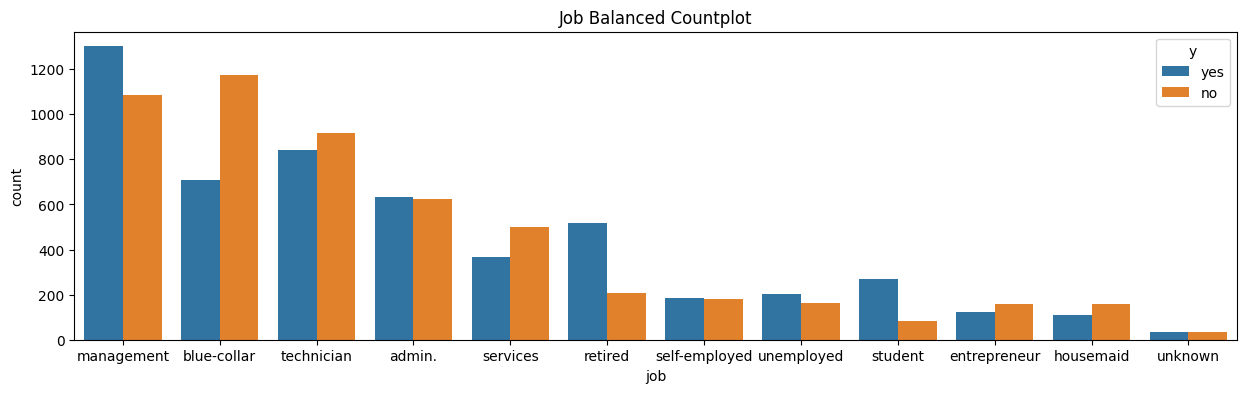

In [25]:
# Countplot job
fig = plt.figure(figsize=(15, 4))
sns.countplot(x="job", hue="y", data=df_balanced, order = df_balanced.job.value_counts().index)
plt.title( 'Job Balanced Countplot')
plt.show()

**Observations on job**

* job. Management, students and retired said "yes" while blue-collar said "no" to the term loan.  This aligns roughly with what we saw on age.




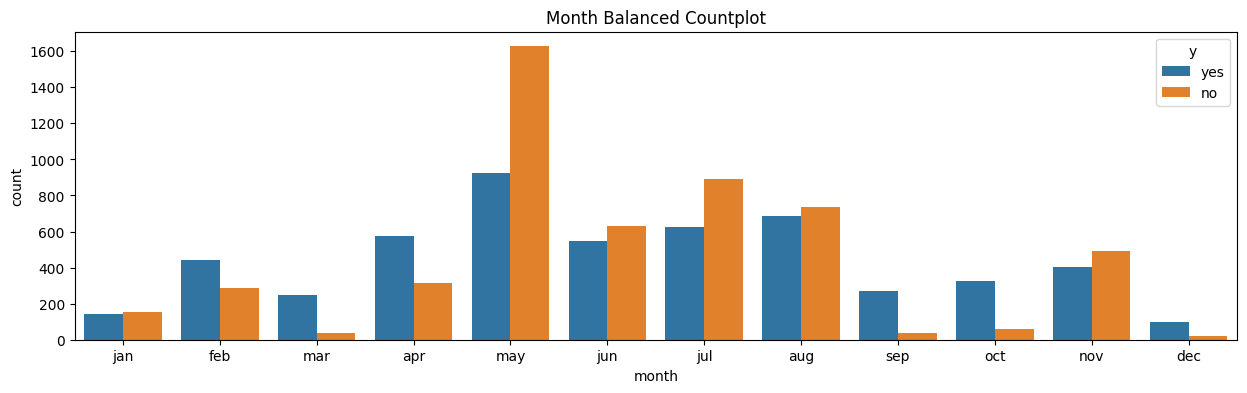

In [26]:
# Countplot month
fig = plt.figure(figsize=(15, 4))
sns.countplot(x="month", hue="y", data=df_balanced ,order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title( 'Month Balanced Countplot')
plt.show()

**Observations on month of the year.**

* month. More respondants said "yes" in May while February, March, April, September, October and December were disproportionately "no".

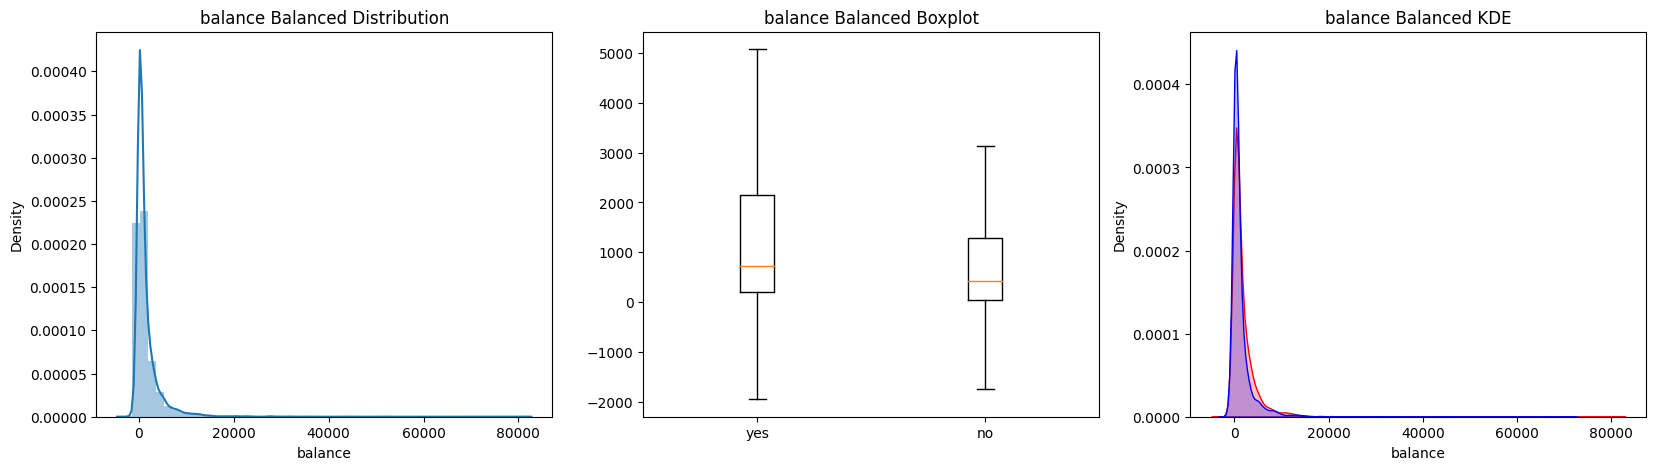

In [27]:
# Distribution, Boxplot and KDE balance, duration and pdays against label y
def crosstab_dbkde(df,Label,lis):
  for col in lis:
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    sns.distplot(df[col])
    plt.title(col + Label+' Distribution')

    plt.subplot(1, 3, 2)
    plt.boxplot([df[col][df.y == 'yes'],df[col][df.y == 'no']],showfliers=False)
    plt.title(col + Label+' Boxplot')
    plt.xticks([1,2], ['yes','no'])

    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col][df.y == 'yes'], shade=True, color="r",label='yes')
    sns.kdeplot(df[col][df.y == 'no'], shade=True, color="b",label='no')
    plt.title(col + Label+' KDE')

    plt.show()
    return

lis = ['balance','duration','pdays']
#crosstab_dbkde(df_baseline,' Baseline',lis)
crosstab_dbkde(df_balanced,' Balanced',lis)

**Observations on balance, duration and pdays features.**

* balance. The average balance of respondants who said "yes" was higher than those who said  "no".
* duration. The call duration of respondants who said "yes" was higher than those who said  "no".
* pdays. The number of days that passed by after the client was last contacted from a previous campaign was higher among respondants who said "yes".

**Consider removing pairplot below.**

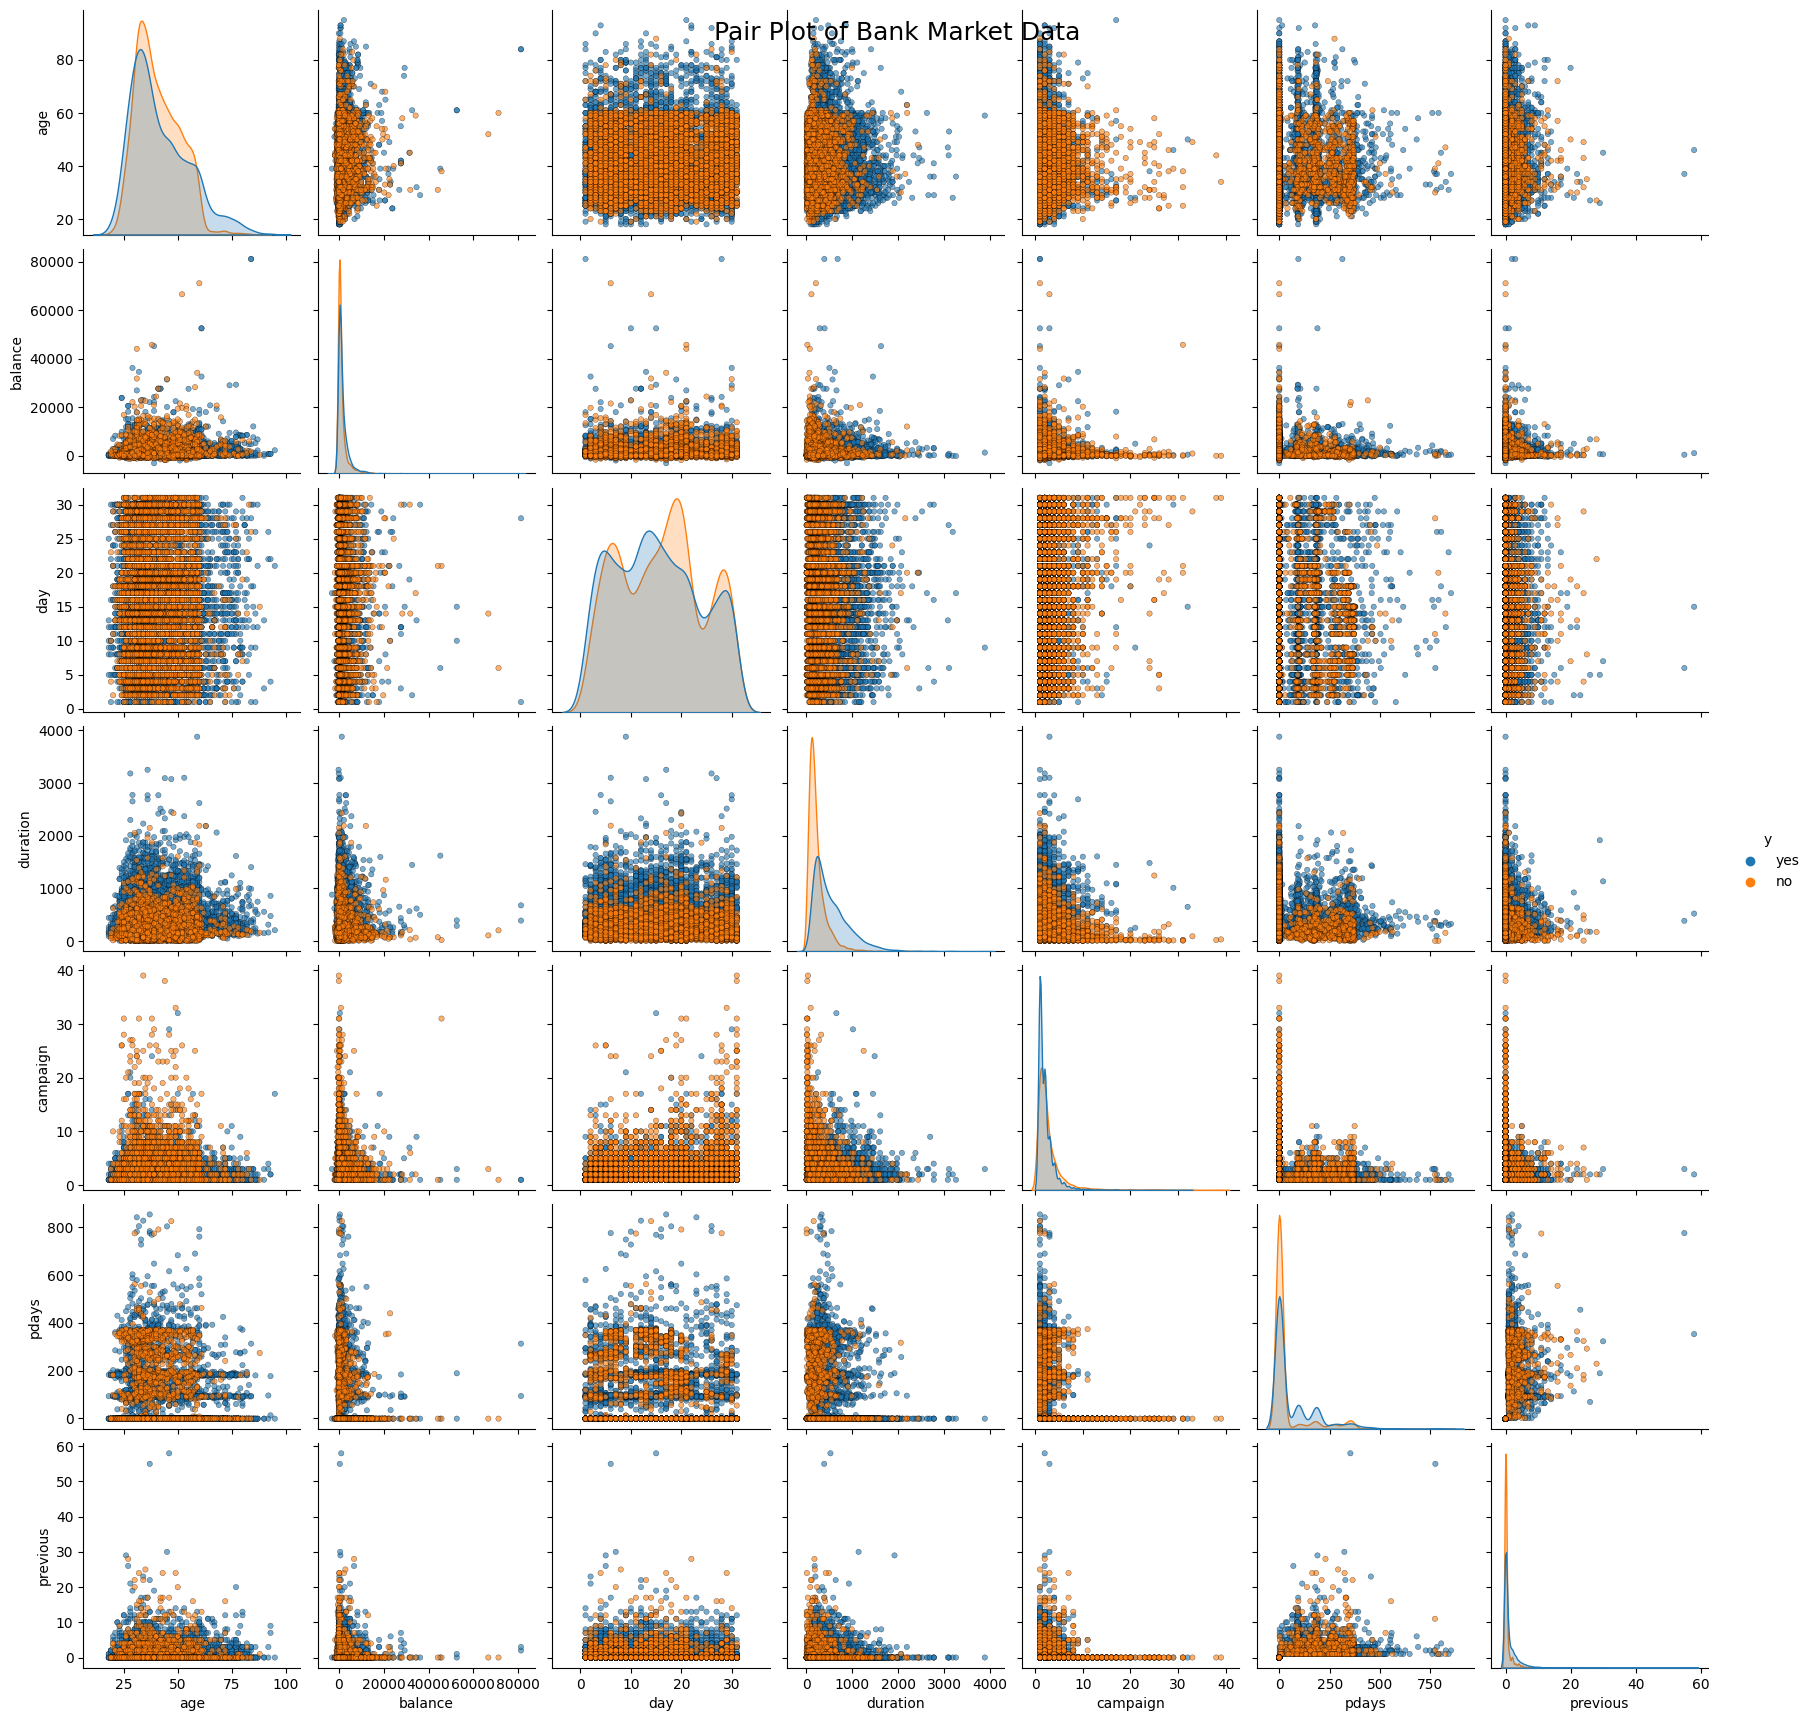

In [28]:
# Pairplot for continuous features
sns.pairplot(df_balanced, hue="y", diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 15, 'edgecolor': 'k'})
plt.suptitle('Pair Plot of Bank Market Data', size = 18);


In [29]:
#@title ## Balanced Dataset Cluster Analysis (k-Means and DBSCAN)


In [30]:
# Clustering with StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from matplotlib import cm #matplotlib color
cmap = cm.get_cmap("Spectral")

In [31]:
# Apply scaling
sc = scaler.fit_transform(df_balanced[['age','balance','duration','campaign','pdays','previous']])

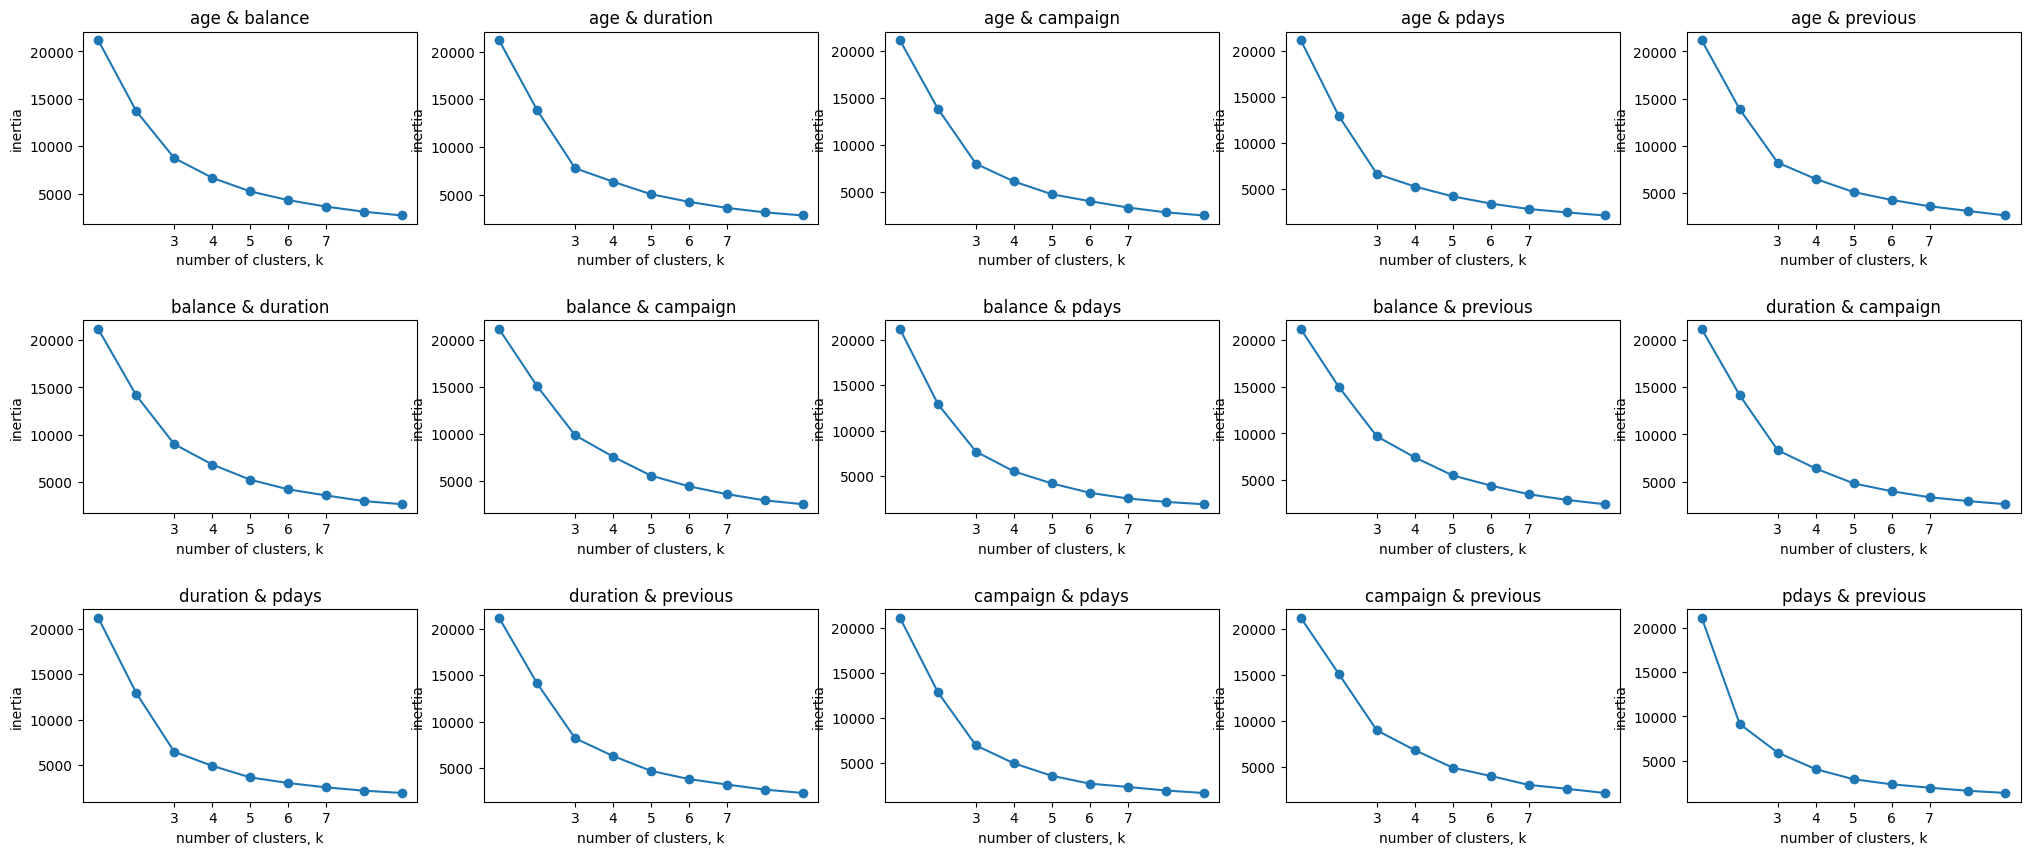

In [32]:
# Get inertia for KMean clustering, which is used to find the best k
# Here we only find the inertia for numerical columns

lis = ['age','balance','duration','campaign','pdays','previous']
m = 0
fig = plt.figure(figsize=(25, 10))
plt.subplots_adjust(hspace = 0.5)

for i, col in enumerate(lis):
  j = i + 1
  while j < len(lis):
    #print(lis[i], lis[j])
    inertia = []
    for k in range(1,10): #clustering
      model = KMeans(n_clusters = k).fit(sc[:,[i,j]])
      inertia.append(model.inertia_)
    #print(inertia)
    m = m + 1 # for plot

    plt.subplot(3, 5, m)

    plt.plot(range(1,10), inertia, '-o')
    plt.title(lis[i] +' & '+ lis[j])
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(range(3,8))

    j = j + 1

plt.show()

**Observation**

Let's set clusters to three (3)

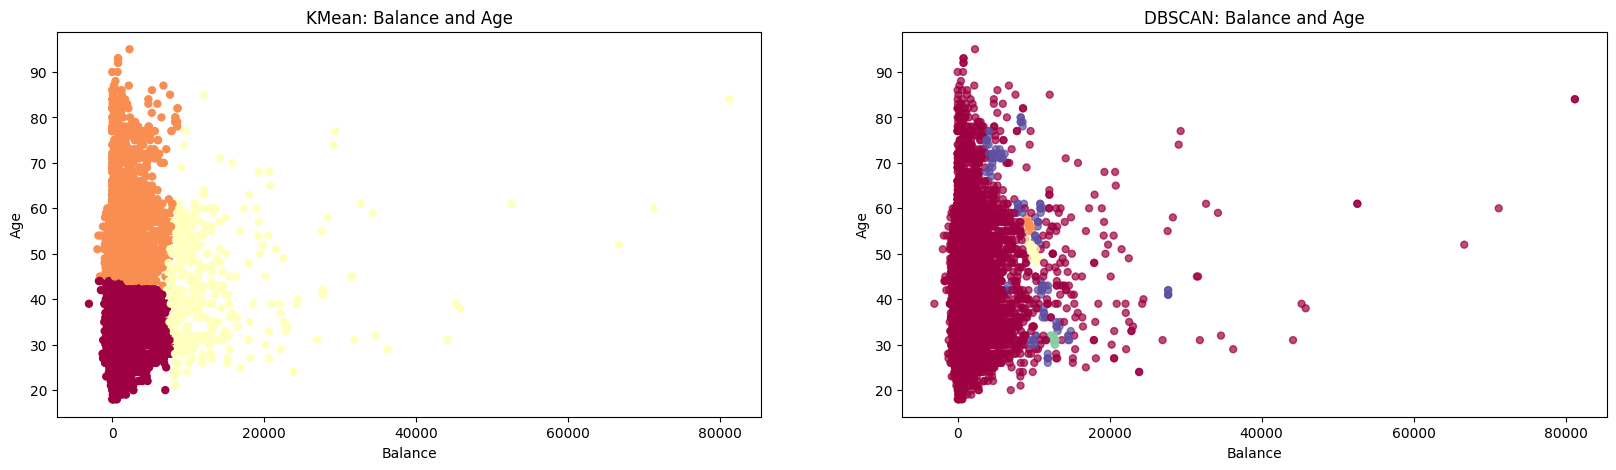

In [33]:
# Balanced Dataset Cluster Analysis: Balance and Age
km_age_balance = KMeans(n_clusters = 3)
km_age_balance.fit(sc[:,[1,0]])
km_age_balance_label = km_age_balance.predict(sc[:,[1,0]])
#km_age_balance.cluster_centers_

dbscan_age_balance_label = DBSCAN(eps=0.15, min_samples=5).fit_predict(sc[:,[1,0]])


fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,0], s = 25, c = [cmap(float(i) /4) for i in km_age_balance_label])
plt.title('KMean: Balance and Age')
plt.xlabel('Balance')
plt.ylabel('Age')


plt.subplot(1, 2, 2)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,0], s = 25, alpha = 0.7,c = [cmap(float(i) /4) for i in dbscan_age_balance_label])
plt.title('DBSCAN: Balance and Age')
plt.xlabel('Balance')
plt.ylabel('Age')

plt.show()

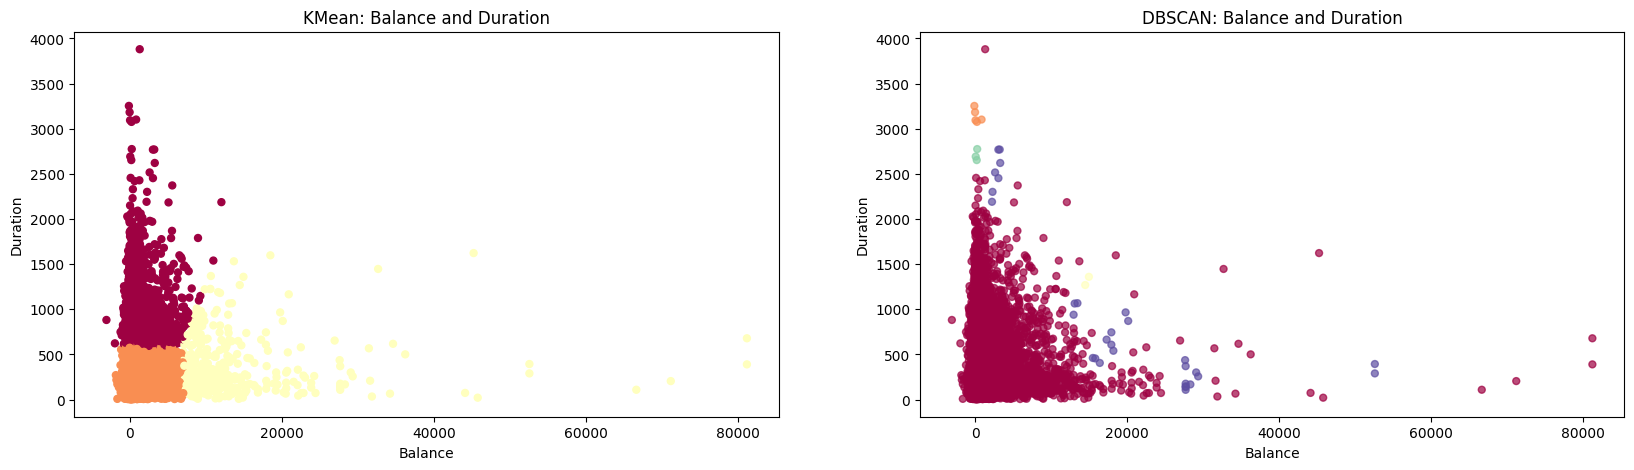

In [34]:
# Balanced Dataset Cluster Analysis: Balance and Duration
km_balance_duration = KMeans(n_clusters = 3)
km_balance_duration.fit(sc[:,[1,2]])
km_balance_duration_label = km_balance_duration.predict(sc[:,[1,2]])
#km_balance_duration.cluster_centers_


dbscan_balance_duration_label = DBSCAN(eps=0.4, min_samples=2).fit_predict(sc[:,[1,2]])

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,2], s = 25 , c = [cmap(float(i) /4) for i in km_balance_duration_label])
plt.title('KMean: Balance and Duration')
plt.xlabel('Balance')
plt.ylabel('Duration')

plt.subplot(1, 2, 2)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,2], s = 25, alpha = 0.7, c = [cmap(float(i) /4) for i in dbscan_balance_duration_label])
plt.title('DBSCAN: Balance and Duration')
plt.xlabel('Balance')
plt.ylabel('Duration')

plt.show()

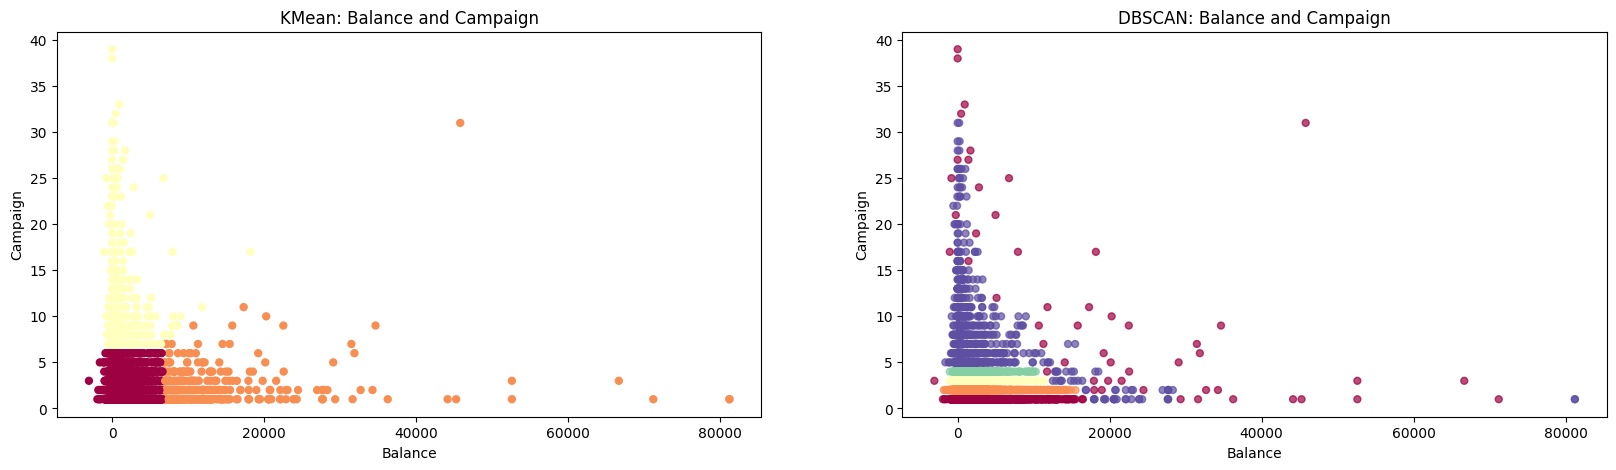

In [35]:
# Balanced Dataset Cluster Analysis: Balance and Campaign
km_balance_campaign = KMeans(n_clusters = 3)
km_balance_campaign.fit(sc[:,[1,3]])
km_balance_campaign_label = km_balance_campaign.predict(sc[:,[1,3]])
#km_balance_campaign.cluster_centers_

dbscan_balance_campaign_label = DBSCAN(eps=0.3, min_samples=2).fit_predict(sc[:,[1,3]])

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,3], s = 25, c = [cmap(float(i) /4) for i in km_balance_campaign_label] )
plt.title('KMean: Balance and Campaign')
plt.xlabel('Balance')
plt.ylabel('Campaign')

plt.subplot(1, 2, 2)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,3], s = 25, alpha = 0.7, c = [cmap(float(i) /4) for i in dbscan_balance_campaign_label])
plt.title('DBSCAN: Balance and Campaign')
plt.xlabel('Balance')
plt.ylabel('Campaign')


plt.show()

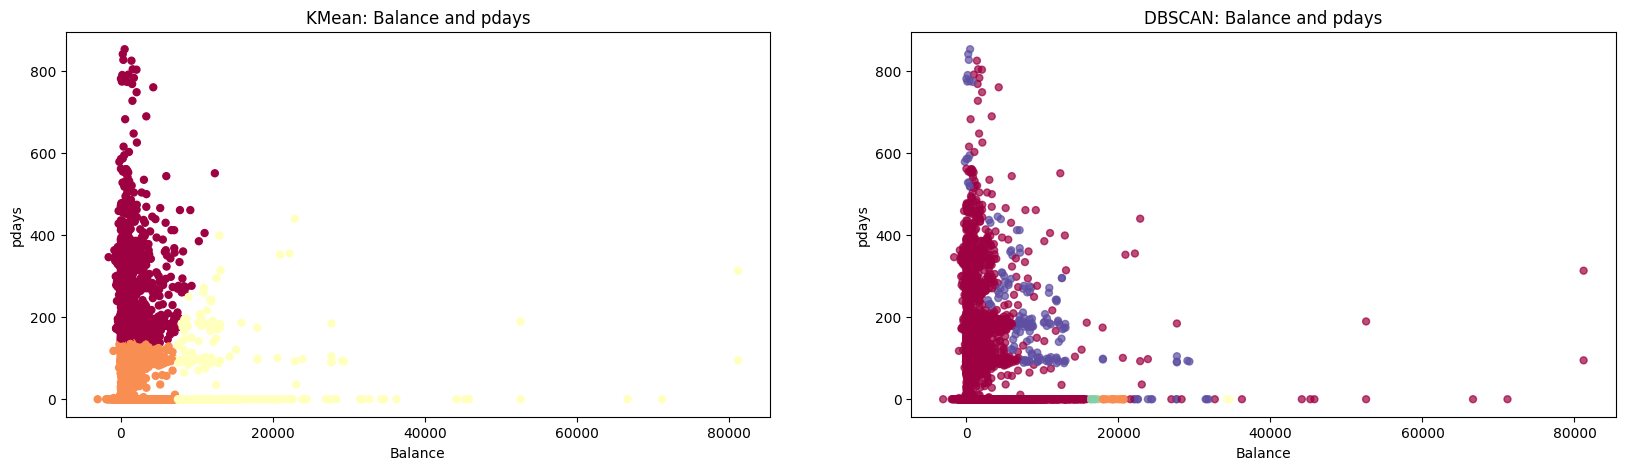

In [36]:
# Balanced Dataset Cluster Analysis: Balance and pdays
km_balance_campaign = KMeans(n_clusters = 3)
km_balance_campaign.fit(sc[:,[1,4]])
km_balance_campaign_label = km_balance_campaign.predict(sc[:,[1,4]])
#km_balance_campaign.cluster_centers_

dbscan_balance_campaign_label = DBSCAN(eps=0.15, min_samples=2).fit_predict(sc[:,[1,4]])

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,4], s = 25, c = [cmap(float(i) /4) for i in km_balance_campaign_label] )
plt.title('KMean: Balance and pdays')
plt.xlabel('Balance')
plt.ylabel('pdays')

plt.subplot(1, 2, 2)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,4], s = 25, alpha = 0.7, c = [cmap(float(i) /4) for i in dbscan_balance_campaign_label])
plt.title('DBSCAN: Balance and pdays')
plt.xlabel('Balance')
plt.ylabel('pdays')


plt.show()

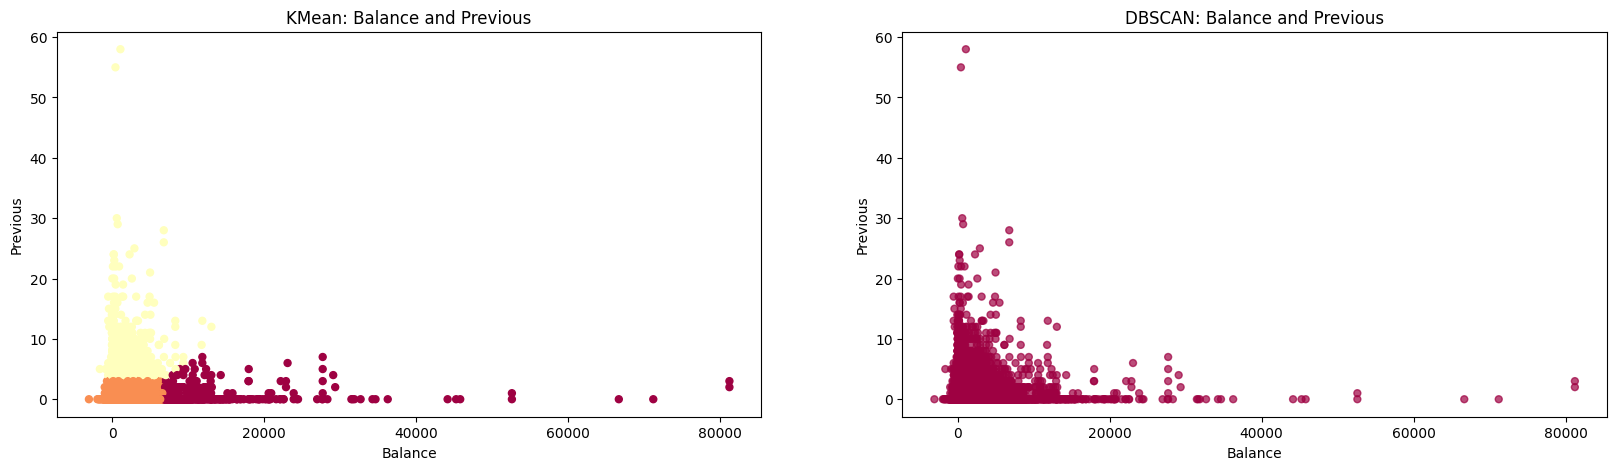

In [37]:
# Balanced Dataset Cluster Analysis: Balance and Previous
km_balance_previous = KMeans(n_clusters = 3)
km_balance_previous.fit(sc[:,[1,5]])
km_balance_previous_label = km_balance_previous.predict(sc[:,[1,5]])
#km_age_balance.cluster_centers_


dbscan_balance_previous_label = DBSCAN(eps=0.55, min_samples=10).fit_predict(sc[:,[1,5]])

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,5], s = 25, c = [cmap(float(i) /4) for i in km_balance_previous_label])
plt.title('KMean: Balance and Previous')
plt.xlabel('Balance')
plt.ylabel('Previous')

plt.subplot(1, 2, 2)
plt.scatter(scaler.inverse_transform(sc)[:,1],scaler.inverse_transform(sc)[:,5], s = 25, alpha = 0.7, c = [cmap(float(i) /4) for i in dbscan_balance_previous_label])
plt.title('DBSCAN: Balance and Previous')
plt.xlabel('Balance')
plt.ylabel('Previous')

plt.show()

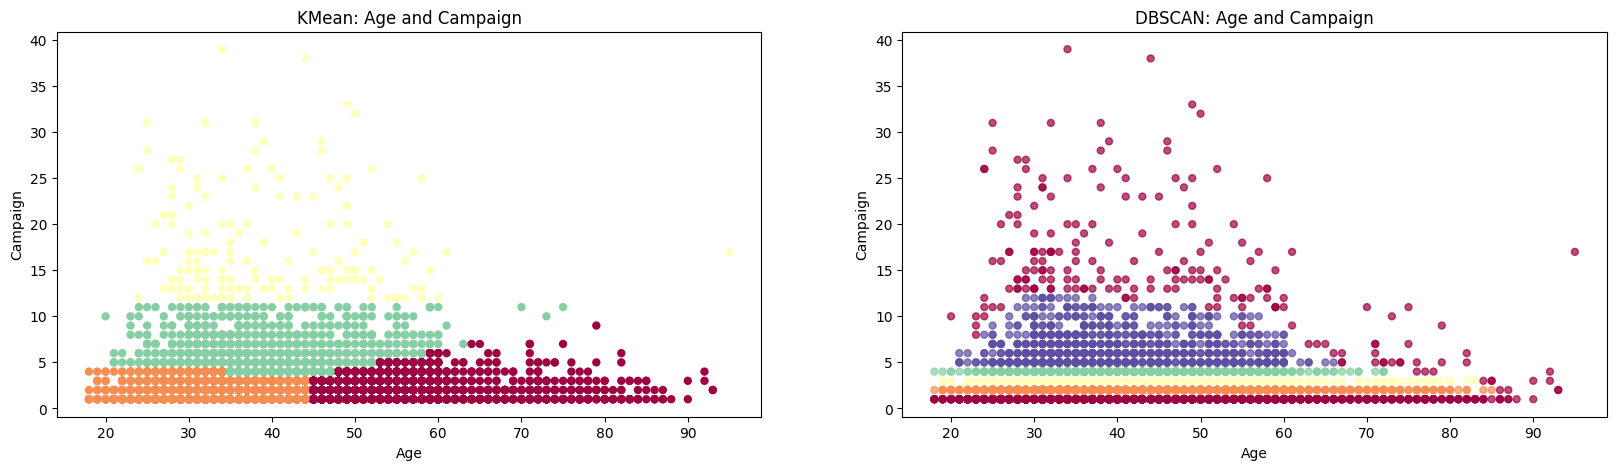

In [38]:
# Balanced Dataset Cluster Analysis: Age and Campaign
km_balance_previous = KMeans(n_clusters = 4)
km_balance_previous.fit(sc[:,[0,3]])
km_balance_previous_label = km_balance_previous.predict(sc[:,[0,3]])
#km_age_balance.cluster_centers_


dbscan_balance_previous_label = DBSCAN(eps=0.3, min_samples=10).fit_predict(sc[:,[0,3]])

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(scaler.inverse_transform(sc)[:,0],scaler.inverse_transform(sc)[:,3], s = 25, c = [cmap(float(i) /4) for i in km_balance_previous_label])
plt.title('KMean: Age and Campaign')
plt.xlabel('Age')
plt.ylabel('Campaign')

plt.subplot(1, 2, 2)
plt.scatter(scaler.inverse_transform(sc)[:,0],scaler.inverse_transform(sc)[:,3], s = 25, alpha = 0.7, c = [cmap(float(i) /4) for i in dbscan_balance_previous_label])
plt.title('DBSCAN: Age and Campaign')
plt.xlabel('Age')
plt.ylabel('Campaign')

plt.show()

# 2. Pipeline


In [39]:
#@title ## Preprocessing

In [40]:
# Preprocessing baseline dataset for yes/no columns ['default','housing','loan','y']
for col in ['default','housing','loan','y']:
    df_baseline[col].replace(['yes', 'no'],[1, 0], inplace=True)

df_baseline.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11305,37,services,divorced,primary,0,0,1,0,unknown,18,jun,77,2,-1,0,unknown,0
21709,56,technician,divorced,secondary,0,5,0,0,cellular,19,aug,98,1,-1,0,unknown,0
15208,36,management,married,tertiary,0,708,1,0,cellular,17,jul,59,3,-1,0,unknown,0
39835,40,blue-collar,married,secondary,0,1451,0,0,cellular,1,jun,314,1,-1,0,unknown,1
10090,45,entrepreneur,divorced,tertiary,0,1273,1,1,unknown,11,jun,197,3,-1,0,unknown,0


In [41]:
# Preprocessing balanced dataset for yes/no columns ['default','housing','loan','y']
for col in ['default','housing','loan','y']:
    df_balanced[col].replace(['yes', 'no'],[1, 0], inplace=True)

df_balanced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
87,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
129,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
168,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [42]:
# Preprocessing data, get dummy for columns ['job','marital', 'education','contact','month','poutcome']
df_baseline = pd.get_dummies(data = df_baseline, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] , prefix = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] , drop_first = True)
print(df_baseline.shape, '\n', df_baseline.columns)
df_baseline.head()

(10578, 43) 
 Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
11305,37,0,0,1,0,18,77,2,-1,0,...,0,1,0,0,0,0,0,0,0,1
21709,56,0,5,0,0,19,98,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
15208,36,0,708,1,0,17,59,3,-1,0,...,1,0,0,0,0,0,0,0,0,1
39835,40,0,1451,0,0,1,314,1,-1,0,...,0,1,0,0,0,0,0,0,0,1
10090,45,0,1273,1,1,11,197,3,-1,0,...,0,1,0,0,0,0,0,0,0,1


In [43]:
df_balanced = pd.get_dummies(data = df_balanced, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] , prefix = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] , drop_first = True)
print(df_balanced.shape, '\n', df_balanced.columns)
df_balanced.head()

(10578, 43) 
 Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
83,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
86,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
87,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
129,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
168,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [44]:
#@title ## PCA Analysis

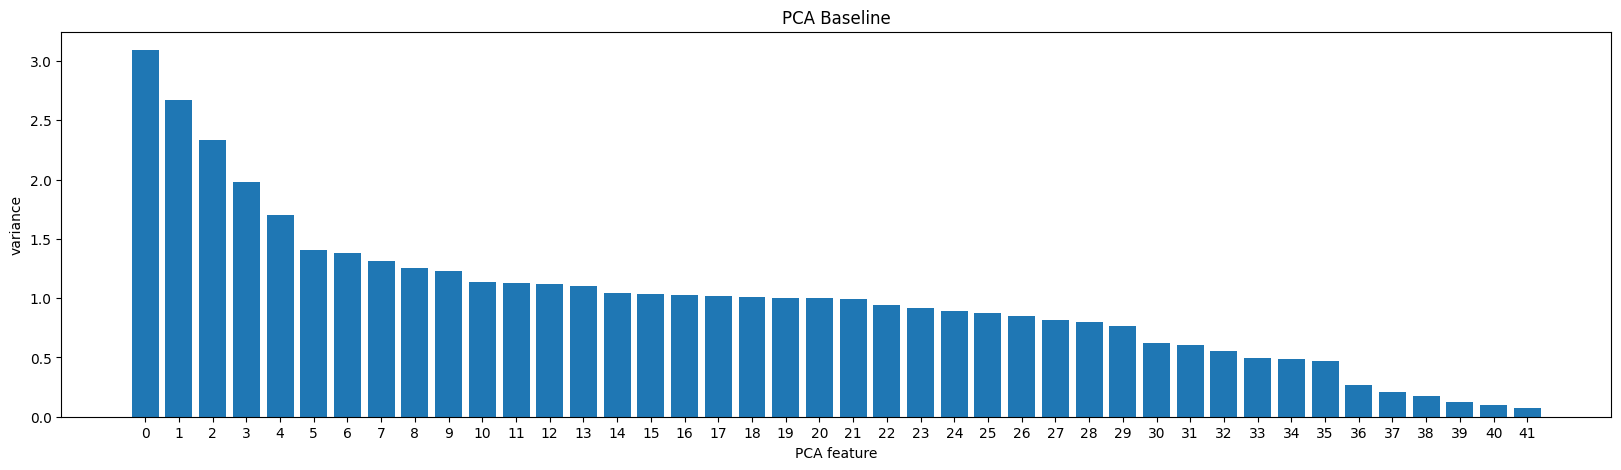

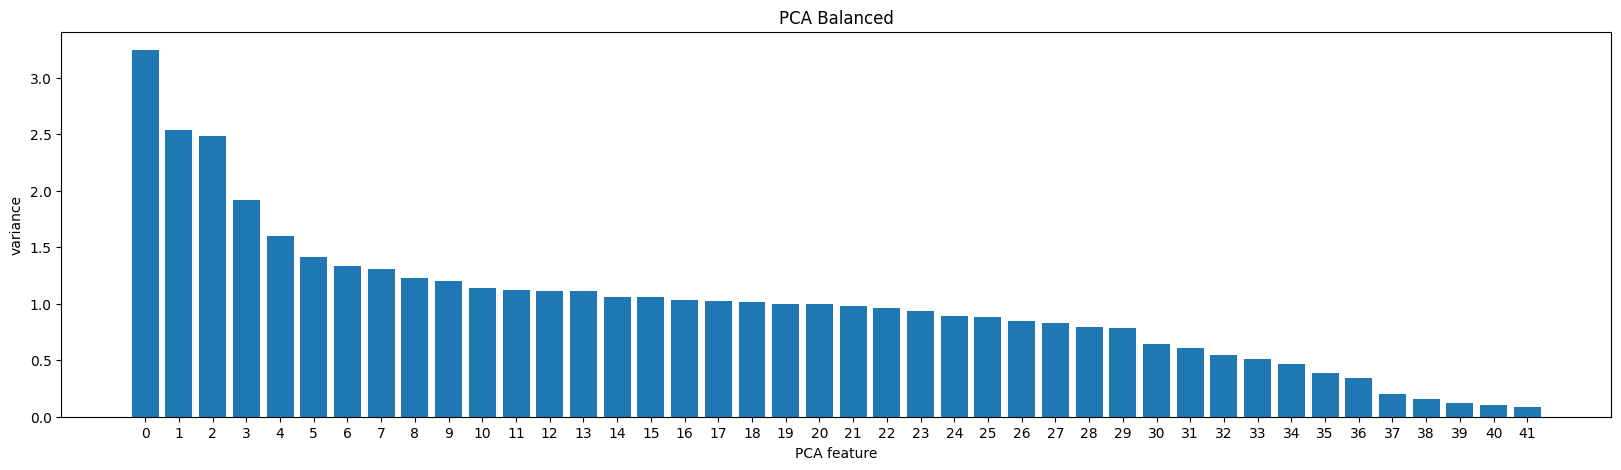

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

def pca_analysis(df,Label):
  # Seperate features and predictor
  X = df.drop(['y'], axis=1)
  y = df['y']

  # Initialize StandardScaler and PCA
  scaler = StandardScaler()
  pca = PCA()

  # Create PCA pipeline
  pipeline = make_pipeline(scaler , pca)
  X_pca = pipeline.fit_transform(X)

  # Plot the explained variances
  features = range(pca.n_components_)

  fig = plt.figure(figsize=(20, 5))
  plt.bar(features, pca.explained_variance_)
  plt.xlabel('PCA feature')
  plt.ylabel('variance')
  plt.xticks(features)
  plt.title('PCA '+Label)
  plt.show()

  return

pca_analysis(df_baseline,"Baseline")
pca_analysis(df_balanced,"Balanced")


In [46]:
#@title ## Modeling: K-Nearest Neighboour, Support Vector Machines, Random Forest, Gradient Boosting, and Deep Neural Network

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix
from sklearn.metrics import classification_report

In [48]:
# Seperate baseline features and predictor
X_baseline = df_baseline.drop(['y'], axis=1)
y_baseline = df_baseline['y']
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.3,  random_state=42)

# Seperate balanced features and predictor
X_balanced = df_balanced.drop(['y'], axis=1)
y_balanced = df_balanced['y']
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3,  random_state=42)

In [49]:
# Initialize StandardScaler and PCA
scaler = StandardScaler()
pca = PCA()

In [50]:
# Reusable Modeling Function
def make_model(clf,clf_name,Title,param_grid,X_train,y_train,X_test,y_test):
  print(Title,'Dataset')
  start_time = time.time()

  # Create pipeline
  pipeline_steps = [("sc", scaler),('pca',pca),( clf_name,clf)]
  pipeline = Pipeline(pipeline_steps)

  #tune parameters
  grid = GridSearchCV(pipeline, param_grid, cv = 5, scoring='accuracy', return_train_score = True, verbose=5, n_jobs=-1)
  grid.fit(X_train, y_train)


  print('Runtime:',time.time()-start_time)
  print(Title,'Dataset best_params_', grid.best_params_)
  print(Title,'Dataset best_score', grid.best_score_)
  y_pred = grid.predict(X_test)

  grid_score=round(accuracy_score(y_test, y_pred) * 100,2)
  print(Title,'Dataset test accuracy_score :', grid_score)
  print(classification_report(y_test, y_pred))
  clf_tn, clf_fp, clf_fn, clf_tp = confusion_matrix(y_test, y_pred).ravel()
  print(Title,'Dataset confusion_matrix: \n tn: %s \n fp: %s \n fn: %s \n tp: %s' % (clf_tn, clf_fp, clf_fn, clf_tp ))
  return grid_score

In [51]:
#@title #### K-Nearest Neighbour (KNN)

In [52]:
knn = KNeighborsClassifier()
params_knn = {'pca__n_components': [27,28,29,30], 'knn__n_neighbors': [5,10,15]}
knn_baseline_score=make_model(knn,"knn","\n-- K-Nearest Neighbour (KNN) Baseline",params_knn,X_train_baseline, y_train_baseline, X_test_baseline, y_test_baseline)
knn_balanced_score=make_model(knn,"knn","\n-- K-Nearest Neighbour (KNN) Balanced",params_knn,X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced)



-- K-Nearest Neighbour (KNN) Baseline Dataset
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Runtime: 63.739423751831055

-- K-Nearest Neighbour (KNN) Baseline Dataset best_params_ {'knn__n_neighbors': 5, 'pca__n_components': 29}

-- K-Nearest Neighbour (KNN) Baseline Dataset best_score 0.8947869408909245

-- K-Nearest Neighbour (KNN) Baseline Dataset test accuracy_score : 89.73
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2821
           1       0.59      0.25      0.36       353

    accuracy                           0.90      3174
   macro avg       0.75      0.62      0.65      3174
weighted avg       0.88      0.90      0.88      3174


-- K-Nearest Neighbour (KNN) Baseline Dataset confusion_matrix: 
 tn: 2758 
 fp: 63 
 fn: 263 
 tp: 90

-- K-Nearest Neighbour (KNN) Balanced Dataset
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Runtime: 66.71659517288208

-- K-Nearest Neighbour (KNN) Balance

**Observations on K-Nearest Neighbour**

KNN overfit on the baseline dataset as can be observed in the low recall score on positives in the baseline test set (19%).  The same metric rises to 71% on the balanced test set even though the overall test accuracy score falls from 88.85% to 76.91%.  Balancing the classes is better.

In [53]:
#@title #### Support Vector Classifier (SVC)

In [55]:
svc = svm.SVC()
params_svc = {'pca__n_components': [29,30,31], "svc__kernel": ["linear", "rbf"], 'svc__C': [0.5,1,1.5],'svc__gamma': [1e-7, 1e-6, 1e-5]}
svc_baseline_score=make_model(svc,"svc","\n-- Support Vector Classifier (SVC) Baseline",params_svc,X_train_baseline, y_train_baseline, X_test_baseline, y_test_baseline)
svc_balanced_score=make_model(svc,"svc","\n-- Support Vector Classifier (SVC) Balanced",params_svc,X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced)


-- Support Vector Classifier (SVC) Baseline Dataset
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Runtime: 561.0892713069916

-- Support Vector Classifier (SVC) Baseline Dataset best_params_ {'pca__n_components': 29, 'svc__C': 1.5, 'svc__gamma': 1e-07, 'svc__kernel': 'linear'}

-- Support Vector Classifier (SVC) Baseline Dataset best_score 0.8942464003503842

-- Support Vector Classifier (SVC) Baseline Dataset test accuracy_score : 89.35
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2821
           1       0.56      0.20      0.29       353

    accuracy                           0.89      3174
   macro avg       0.73      0.59      0.62      3174
weighted avg       0.87      0.89      0.87      3174


-- Support Vector Classifier (SVC) Baseline Dataset confusion_matrix: 
 tn: 2766 
 fp: 55 
 fn: 283 
 tp: 70

-- Support Vector Classifier (SVC) Balanced Dataset
Fitting 5 folds for each of 54 candidates, totallin

**Observations on Support Vector Classifier**

SVC overfit on the baseline dataset the same as KNN as can be observed in the low recall score on positives in the baseline test set (27%).  The same metric rises to 81% on the balanced test set even though the overall test accuracy score falls from 89.45% to 81.98%.  Balancing the classes is better again.

In [56]:
#@title #### Random Forest Classifier (RFC)

In [57]:
rfc = RandomForestClassifier()
params_rfc = {'pca__n_components': [33,34,35,36], 'rfc__n_estimators': [50,100,150,200]}
rfc_baseline_score=make_model(rfc,"rfc","\n-- Random Forest Classifier (RFC) Baseline",params_rfc,X_train_baseline, y_train_baseline, X_test_baseline, y_test_baseline)
rfc_balanced_score=make_model(rfc,"rfc","\n-- Random Forest Classifier (RFC) Balanced",params_rfc,X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced)


-- Random Forest Classifier (RFC) Baseline Dataset
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime: 342.210901260376

-- Random Forest Classifier (RFC) Baseline Dataset best_params_ {'pca__n_components': 36, 'rfc__n_estimators': 50}

-- Random Forest Classifier (RFC) Baseline Dataset best_score 0.8972177308976768

-- Random Forest Classifier (RFC) Baseline Dataset test accuracy_score : 89.73
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2821
           1       0.58      0.29      0.38       353

    accuracy                           0.90      3174
   macro avg       0.75      0.63      0.66      3174
weighted avg       0.88      0.90      0.88      3174


-- Random Forest Classifier (RFC) Baseline Dataset confusion_matrix: 
 tn: 2747 
 fp: 74 
 fn: 252 
 tp: 101

-- Random Forest Classifier (RFC) Balanced Dataset
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime: 294.2691514492035

-- Ra

**Observations on Random Forest Classifier**

RFC overfit on the baseline dataset the same as KNN and SVC as can be observed in the low recall score on positives in the baseline test set (34%).  The same metric rises to 85% on the balanced test set even though the overall test accuracy score falls from 89.29% to 83.36%.  Balancing the classes is better again.

In [58]:
#@title #### Gradient Boosting Classifier (GBC)

In [ ]:
gbc = GradientBoostingClassifier()
params_gbc = {'pca__n_components': [38, 39, 40], 'gbc__learning_rate': [0.05, 0.1, 0.5] , 'gbc__n_estimators': [100,150,200]}
gbc_baseline_score=make_model(gbc,"gbc","\n-- Gradient Boosting Classifier (GBC) Baseline",params_gbc,X_train_baseline, y_train_baseline, X_test_baseline, y_test_baseline)
gbc_balanced_score=make_model(gbc,"gbc","\n-- Gradient Boosting Classifier (GBC) Balanced",params_gbc,X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced)

**Observations on Gradient Boosting**

GBC overfit on the baseline dataset the same as KNN, SVC and RFC as can be observed in the low recall score on positives in the baseline test set (34%).  The same metric rises to 84% on the balanced test set even though the overall test accuracy score falls from 89.7% to 83.96%.  Balancing the classes is better again.

In [63]:
#@title #### Deep Neural Network (DNN)

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from tensorflow.python.layers import base
import tensorflow.contrib.slim as slim

from keras.layers import Dense, Input, Embedding, Reshape, Dropout
from keras.models import Model,Sequential
from keras.layers.merge import concatenate
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm

In [64]:
def create_model():

  # default values
  activation='relu' # or linear
  dropout_rate=0.5 # 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
  init_mode='uniform'
  weight_constraint=3 # 1, 2, 3, 4, 5
  optimizer='adam' # or SGD
  lr = 0.01 #0.001, 0.01, 0.1, 0.2, 0.3
  momentum=0.1 #0.0, 0.2, 0.4, 0.6, 0.8, 0.9

  model = Sequential()
  model.add(Dense(128, input_dim=42, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(128, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [65]:
def make_dnn(clf,clf_name,Title,X_train,y_train,X_test,y_test):
  print(Title,'Dataset')
  start_time = time.time()

  # Initialize StandardScaler
  scaler = StandardScaler()

  # Create pipeline
  pipeline = make_pipeline(scaler)
  X_scaled = pipeline.fit_transform(X_train)
  X_test_scaled = pipeline.fit_transform(X_test)


  # Fit the model
  clf.fit(X_scaled, y_train, epochs=100, batch_size=50)

  # Apply the model to the holdout data
  y_pred = clf.predict(X_test_scaled)

  # Set threshold = 0.5. Increasing the threshold decreases the recall.
  y_pred = [0 if x <0.5 else 1 for x in y_pred]


  print('Runtime:',time.time()-start_time)

  dnn_score=round(accuracy_score(y_test_balanced, y_pred) * 100,2)
  print(Title,'Dataset test accuracy_score',dnn_score)
  print(classification_report(y_test_balanced, y_pred))
  dnn_tn, dnn_fp, dnn_fn, dnn_tp = confusion_matrix(y_test_balanced, y_pred).ravel()
  print(Title,'Dataset confusion_matrix: \n tn: %s \n fp: %s \n fn: %s \n tp: %s' % (dnn_tn, dnn_fp, dnn_fn, dnn_tp ))
  return dnn_score



In [ ]:
# Wrap the model using the function you created
ker = KerasRegressor(build_fn=create_model,verbose=0,shuffle=True)
ker_baseline_score=make_dnn(ker,"ker","\n-- Deep Neural Network (DNN) Baseline",X_train_baseline, y_train_baseline, X_test_baseline, y_test_baseline)
ker_balanced_score=make_dnn(ker,"ker","\n-- Deep Neural Network (DNN) Balanced",X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced)


**Observations on Deep Neural Network**

DNN did no better than random guess on the baseline test set (50:50). The same metric rises to 86% on the balanced test set whether positive or negative and precision or recall. Balancing the classes is better again.

## Comparing Models

In [73]:
ker_balanced_score = 0.85
print('KNN accuracy balanced test score :              ', knn_balanced_score)
print('SVM balanced test accuracy score :              ', svc_balanced_score)
print('Random Forest balanced test accuracy score :    ', rfc_balanced_score)
print('Gradient Boosting balanced test accuracy score :', gbc_balanced_score)
print('DNN balanced test accuracy score :              ', ker_balanced_score)

KNN accuracy balanced test score :               78.64
SVM balanced test accuracy score :               81.85
Random Forest balanced test accuracy score :     82.73
Gradient Boosting balanced test accuracy score : 83.4
DNN balanced test accuracy score :               0.85
